Project - Rich Indian

Author - Aung Kyaw Win

Datasets - 
Population by State: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-detail.html#v2023

Income by Race: https://www.kaggle.com/datasets/priyamchoksi/adult-census-income-dataset

US Population by State and Race: https://www.visualcapitalist.com/visualizing-u-s-population-by-race/


In [49]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Exploratory Data Analysis (EDA)

In [67]:
population = pd.read_excel(r"c:/Users/akw97/Downloads/SCPRC-EST2023-18+POP.xlsx")
print(population.head())
print(population.info())

  table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts)  \
0                                           Location                                                             
1                                           .Alabama                                                             
2                                            .Alaska                                                             
3                                           .Arizona                                                             
4                                          .Arkansas                                                             

         Unnamed: 1      Unnamed: 2  Unnamed: 3  
0  Total Population  Age 18 & Older  Percentage  
1           5108468         3977628        77.9  
2            733406          557899        76.1  
3           7431344         5848310        78.7  
4           3067732         2362124          77  
<class 'pandas.

In [51]:
income = pd.read_csv(r"C:\Users\akw97\Downloads\archive (1)\adult.csv")
print(income.head())
print(income.info())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [59]:
income = income.dropna()
income = income.drop(columns=['fnlwgt', 'education', 'marital.status', 'relationship', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'])
print(income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         32561 non-null  int64 
 1   workclass   32561 non-null  object
 2   occupation  32561 non-null  object
 3   race        32561 non-null  object
 4   sex         32561 non-null  object
 5   income      32561 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB
None


Income Data Population by Race

In [53]:
total_count = income.groupby('race').size()
result = pd.DataFrame({'Total Count': total_count})
print(result)

                    Total Count
race                           
Amer-Indian-Eskimo          311
Asian-Pac-Islander         1039
Black                      3124
Other                       271
White                     27816


Workclass Contribution

In [54]:
workclass_contrib = income.groupby(['workclass', 'race']).size().unstack().fillna(0)
workclass_contrib = workclass_contrib.div(workclass_contrib.sum(axis=1), axis=0) *100
print(workclass_contrib)

race              Amer-Indian-Eskimo  Asian-Pac-Islander      Black     Other  \
workclass                                                                       
?                           1.361656            3.540305  11.601307  1.252723   
Federal-gov                 1.979167            4.583333  17.604167  0.729167   
Local-gov                   1.720019            1.863354  13.760153  0.477783   
Never-worked                0.000000            0.000000  28.571429  0.000000   
Private                     0.837152            3.141523   9.587593  0.938491   
Self-emp-inc                0.179211            4.121864   2.060932  0.448029   
Self-emp-not-inc            0.944510            2.872885   3.659976  0.354191   
State-gov                   1.155624            4.468413  12.249615  0.308166   
Without-pay                 0.000000            7.142857   7.142857  0.000000   

race                  White  
workclass                    
?                 82.244009  
Federal-gov       

Overall Workclass Contribution

C:\Users\akw97\AppData\Local\Temp\ipykernel_17348\2285478267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='workclass', data=income, palette='dark', order=income['workclass'].value_counts().index)


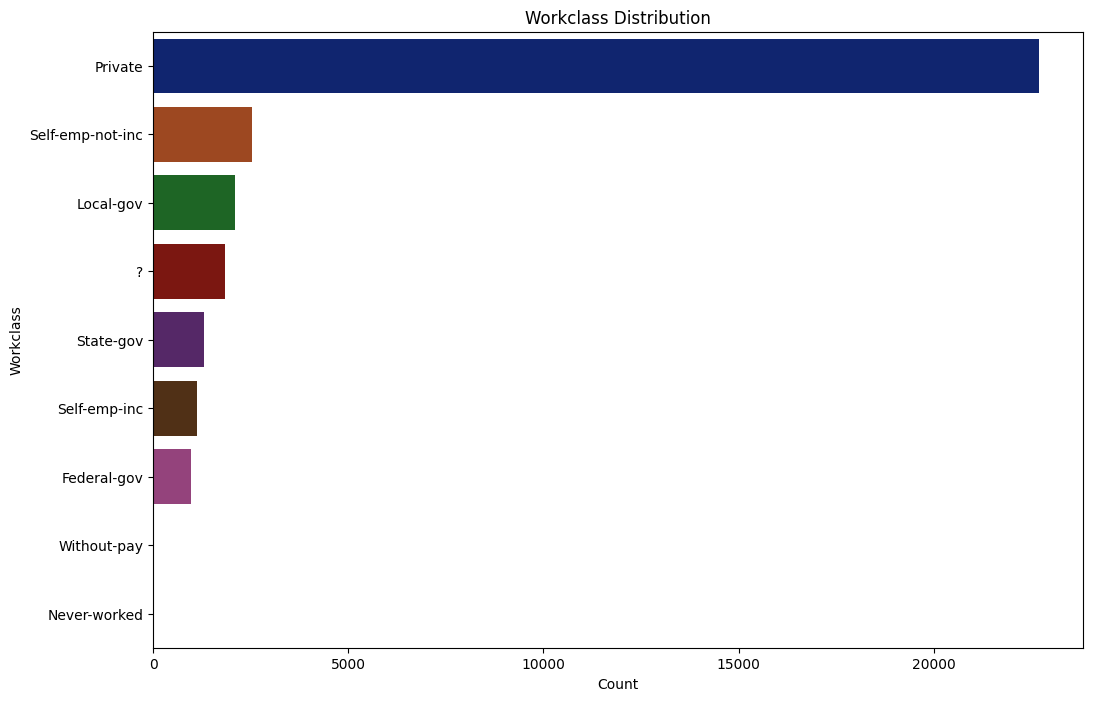

In [55]:
plt.figure(figsize=(12, 8))
sns.countplot(y='workclass', data=income, palette='dark', order=income['workclass'].value_counts().index)
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

Age Visualization

Text(0.5, 1.0, 'Age Distribution')

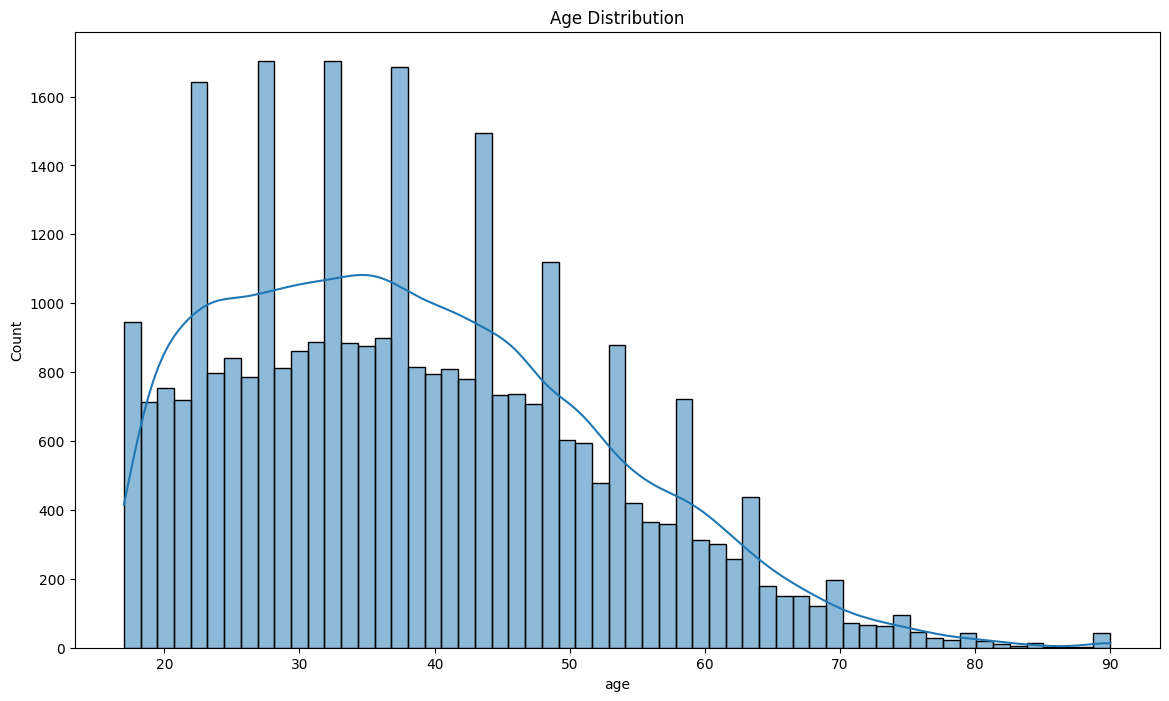

In [56]:
plt.figure(figsize=(14,8))
sns.histplot(income['age'], kde=True)
plt.title('Age Distribution')

In [61]:
numeric_cols = income.select_dtypes(include=['int64', 'float64']).columns
categ_cols = income.drop(columns=['income']).select_dtypes(exclude=['int64', 'float64']).columns

numeric_cols, categ_cols

(Index(['age'], dtype='object'),
 Index(['workclass', 'occupation', 'race', 'sex'], dtype='object'))

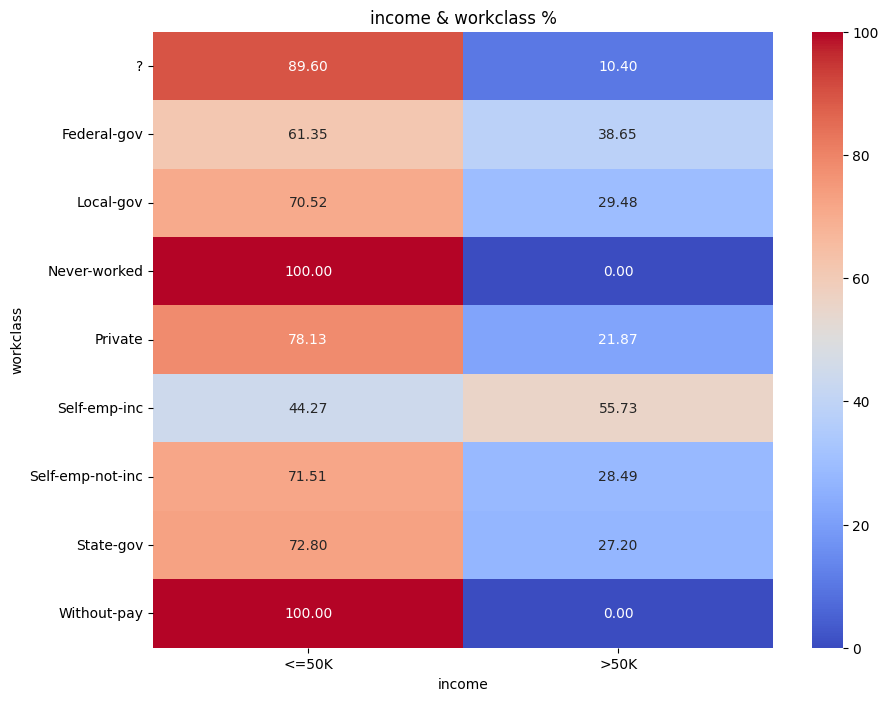

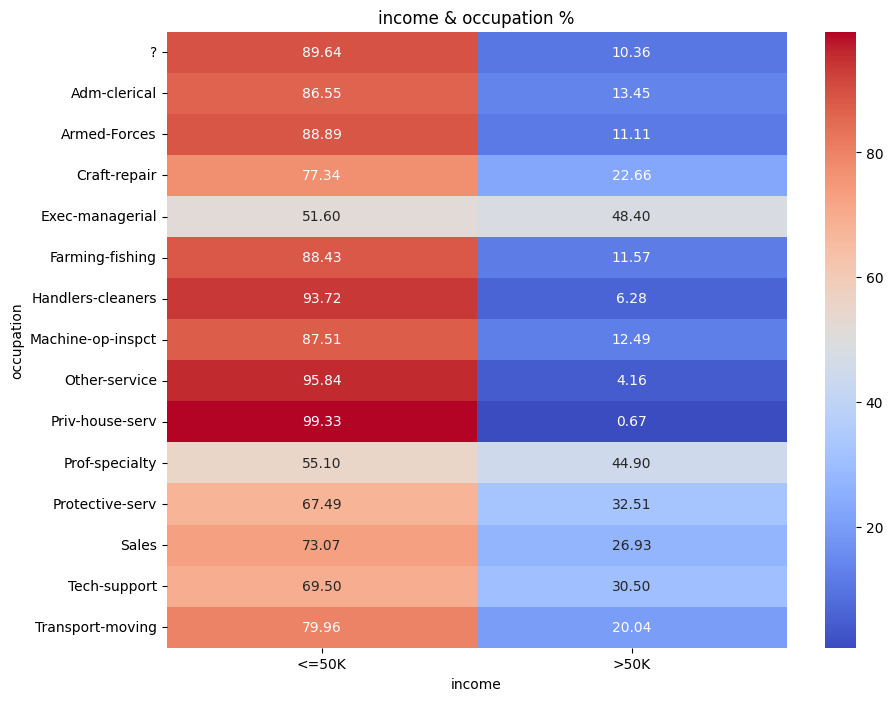

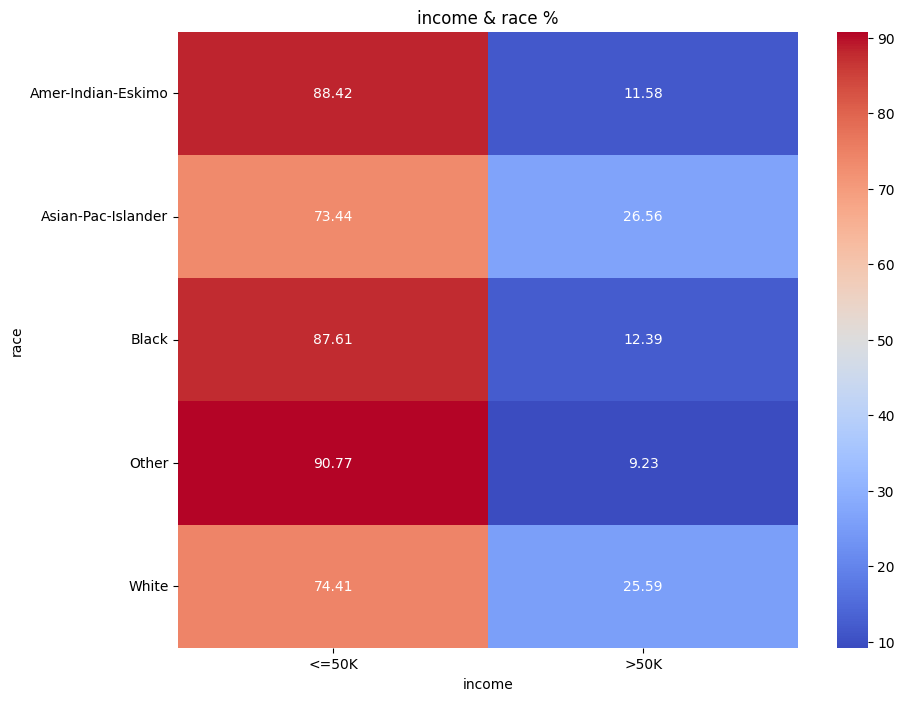

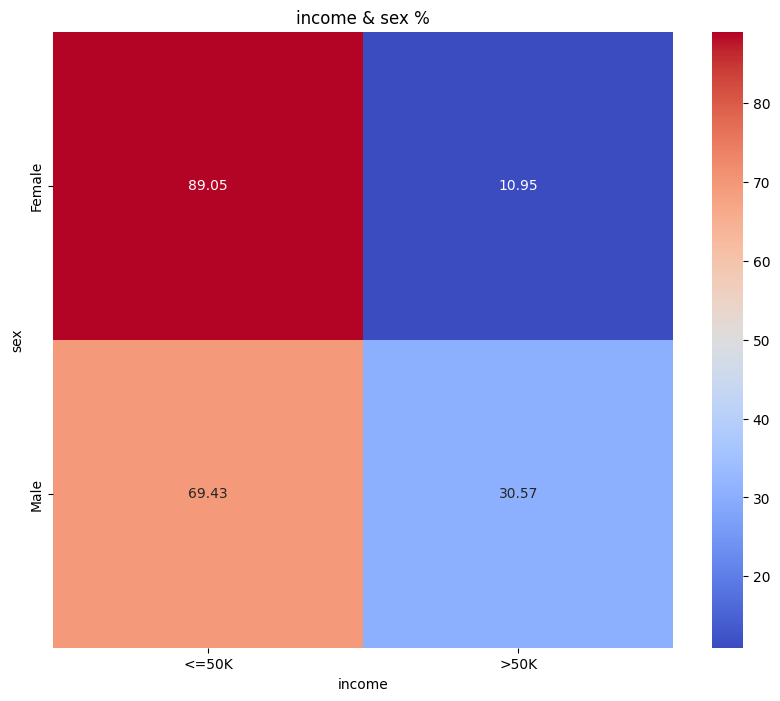

In [62]:
for col in categ_cols:
    data = income[~income[col].isnull()]
    tbl = pd.crosstab(data[col], data['income'])
    tbl = tbl.div(tbl.sum(axis=1), axis=0) * 100
    plt.figure(figsize=(10,8))
    plt.title(f'income & {col} %')
    sns.heatmap(data=tbl, annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

In [72]:
# Pivot table (state vs. population)
population1 = population.sort_values(by="Total Population", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="state", y="Total Population", palette="coolwarm")

# Labels
plt.xticks(rotation=90)
plt.title("Population of Each State")
plt.xlabel("State")
plt.ylabel("Population")

plt.show()


KeyError: 'Total Population'